# Section 3: Building Interactive Visualizations for Data Exploration

When exploring our data, interactive visualizations can provide the most value. Without having to create multiple iterations of the same plot, we can use mouse actions (e.g., click, hover, zoom, etc.) to explore different aspects and subsets of the data. In this section, we will learn how to use a few of the libraries in the HoloViz ecosystem to create interactive visualizations for exploring our data utilizing the Bokeh backend.

<div style="text-align: center;">
<img width="300" src="https://images.unsplash.com/photo-1526226060519-126d75eaa5e2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2338&q=80" alt="Baby elephant"/>
<div><small><em>Listen up.</em></small></div>
</div>

## Learning Path

1. **Adding tooltips and sliders**
2. Linking plots
3. Additional plot types

## Adding tooltips and sliders

For our first foray into interactive visualizations, we will recreate the earthquake map from the previous section. However, this time, we will make it possible to select the month using a slider, zoom in on the map, and view additional information on each earthquake with tooltips.

To make this visualization, we will work through the following steps:

1. Read in and prepare the data.
2. Import the required libraries and set up the Bokeh backend.
3. Create an overlay with tooltips and a slider.
4. Render the visualization.

### 1. Read in and prepare the data.

As we did in the previous section, we will use GeoPandas to read in our dataset. We are once again creating a new column for the month, but this time, we are also dropping any columns with missing information:

In [1]:
import geopandas as gpd
import pandas as pd

earthquakes = gpd.read_file('../data/earthquakes.geojson').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    month=lambda x: x.time.dt.month
).dropna()

earthquakes.head()

mag                                    place                    time  \
0  2.75          80 km N of Isabela, Puerto Rico 2020-01-01 00:01:56.590   
1  2.55          64 km N of Isabela, Puerto Rico 2020-01-01 00:03:38.210   
2  1.81  12 km SSE of Maria Antonia, Puerto Rico 2020-01-01 00:05:09.440   
3  1.84   9 km SSE of Maria Antonia, Puerto Rico 2020-01-01 00:05:36.930   
4  1.64   8 km SSE of Maria Antonia, Puerto Rico 2020-01-01 00:09:20.060   

   tsunami magType                               geometry  month  
0        0      md  POINT Z (-67.12750 19.21750 12.00000)      1  
1        0      md   POINT Z (-67.09010 19.07660 6.00000)      1  
2        0      md   POINT Z (-66.85410 17.87050 6.00000)      1  
3        0      md   POINT Z (-66.86360 17.89930 8.00000)      1  
4        0      md   POINT Z (-66.86850 17.90660 8.00000)      1

*Source: [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/)*

### 2. Import the required libraries and set up the Bokeh backend.

We will be working with GeoViews once again. However, this time, we are going to use the Bokeh backend. Bokeh maps use the [Mercator](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#mercator) projection, so we will also need to import the `crs` module from Cartopy in order to project back into the coordinate system used by our data ([Plate Carree](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#platecarree) projection):

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
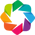

In [2]:
from cartopy import crs
import geoviews as gv
import geoviews.feature as gf

gv.extension('bokeh')

*Tip: You can read more about projections in the GeoViews documentation [here](https://geoviews.org/user_guide/Projections.html) and in the Cartopy documentation [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).*

### 3. Create an overlay with tooltips and a slider.

We will start by creating our points and specifying their ranges:

In [3]:
points = gv.Points(
    earthquakes,
    kdims=['longitude', 'latitude'],
    vdims=['month', 'place', 'tsunami', 'mag', 'magType']
)

# set colorbar limits for magnitude and axis limits
points = points.redim.range(
    mag=(-2, 10), longitude=(-180, 180), latitude=(-90, 90)
)

Next, we will create an overlay with a slider for the month:

In [4]:
overlay = gf.land * gf.coastline * gf.borders * points.groupby('month')

Finally, we customize each of the components of our plot, adding the option to hover over the points to trigger a tooltip:

In [5]:
interactive_map = overlay.opts(
    gv.opts.Feature(projection=crs.PlateCarree()),
    gv.opts.Overlay(width=700, height=450),
    gv.opts.Points(color='mag', cmap='fire_r', colorbar=True, tools=['hover'])
)

### 4. Render the visualization.

While we could use the `hv.output()` function to render our visualization, we will use [Panel](https://panel.holoviz.org/) for this example. Panel, which is also part of HoloViz, provides additional functionality and flexibility when it comes to the layout. As you create more complex visualizations, Panel will become a necessity:

In [6]:
import panel as pn

earthquake_viz = pn.panel(interactive_map, widget_location='bottom')

Try using the slider, tooltips, and zoom/pan functionality:

In [7]:
earthquake_viz.embed()

Column
    [0] HoloViews(HoloMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] DiscreteSlider(formatter='%d', margin=(20, 20, 20, 20), name='month', options=OrderedDict([('1', ...]), value=1, width=250)
        [2] HSpacer()

*Tip: Whenever we interact with the visualization, it has to determine what to update, which can be slow if the JavaScript visualization has to work with the Python backend. To get around this, you can use Panel to embed the visualization like we are doing above. Be careful though &ndash; this can make your notebook file size much larger. Another option is to look into the [Datashader](https://datashader.org/) library from HoloViz.*

<p>The interactivity works best in a notebook environment &ndash; here's an example of the slider, tooltips, and zoom/pan functionality in action:</p>

<div style="text-align: center;">
    <img width="600" height="400" src="https://raw.githubusercontent.com/stefmolin/python-data-viz-workshop/main/media/interactive_map.gif" style="border: 5px solid #555;">
</div>

## Learning Path

1. Adding tooltips and sliders
2. **Linking plots**
3. Additional plot types

## Linking plots
In the previous example, we saw that we could link together a slider and a plot. We can also link together plots, which makes using interactivity to explore our data even more powerful. For this example, we will create a link between a map of the earthquakes in January 2020 and a table of those same earthquakes that provides some additional information; we will be able to select earthquakes on the map and use that to filter our dataset. To further explore HoloViz, we will use the [hvPlot](https://hvplot.holoviz.org/index.html) library here; hvPlot makes it easy to build interactive visualizations with syntax similar to plotting in pandas.

We will work through the following steps to build this visualization:
1. Isolate the January earthquake data and prepare it for plotting.
2. Enable the use of hvPlot for interactive plotting with pandas.
3. Build a layout composed of an interactive map and a table with hvPlot.
4. Link selections across the visualizations in the layout.

### 1. Isolate the January earthquake data and prepare it for plotting.
Let's filter our dataset down to just January and then pull out the latitude and longitude information for our plot:

In [8]:
january_earthquakes = earthquakes.query('month == 1').assign(
    longitude=lambda x: x.geometry.x,
    latitude=lambda x: x.geometry.y
).drop(columns=['month', 'geometry'])

### 2. Enable the use of hvPlot for interactive plotting with pandas. 
To enable interactive plotting with pandas, we have to import the following:

In [9]:
import hvplot.pandas

**Important**: While hvPlot is using HoloViews and GeoViews for the plotting logic, there is currently a [bug](https://github.com/holoviz/geoviews/issues/497) with this feature in GeoViews; however, we can still put together a working example using hvPlot since the projections are handled differently.

### 3. Build a layout composed of an interactive map and a table with hvPlot.

Plotting with hvPlot works just like plotting with pandas &ndash; instead of calling the `plot()` method, we now call `hvplot()` to switch from static plots to interactive ones with the Bokeh backend. In doing so, hvPlot will take care of the HoloViews and GeoViews code for us. Here, we make the interactive map using tiles, which makes it possible to zoom in on the map and see more detail:

In [10]:
geo = january_earthquakes.hvplot(
    x='longitude', y='latitude', kind='points',
    color='mag', cmap='fire_r', clim=(-2, 10),
    tiles='CartoLight', geo=True, global_extent=True,
    xlabel='Longitude', ylabel='Latitude', title='January 2020 Earthquakes',
    frame_height=450
)

Next, we create the table by once again calling the `hvplot()` method:

In [11]:
table = january_earthquakes.sort_values(['longitude', 'latitude']).hvplot(
    kind='table', width=650, height=450, title='Raw Data'
)

Now, we create a layout with the map and table:

In [12]:
layout = geo + table

### 4. Link selections across the visualizations in the layout.
With our layout, we have everything we need to compose our visualization &ndash; we just need to link the components together. Here, we are creating an instance, so that we can use it to filter our data after interacting with the visualization:

In [13]:
import holoviews as hv

selection = hv.link_selections.instance()
map_and_table_tabs = selection(layout).opts(tabs=True)

Let's take a look at our visualization now. Try using the **Box Select** tool to select some earthquakes on the map and then take a look at the **Raw Data** tab:

In [14]:
map_and_table_tabs

:Layout
   .Overlay.I :DynamicMap   []
      :Overlay
         .Tiles.I      :Tiles   [x,y]
         .Points.I     :Points   [longitude,latitude]   (mag)
         .Points.II    :Points   [longitude,latitude]   (mag)
         .Rectangles.I :Rectangles   [x0,y0,x1,y1]
         .Path.I       :Path   [x,y]
   .Table.I   :DynamicMap   []
      :Table   [mag,place,time,tsunami,magType,longitude,latitude]

<p>The result can be interacted with after displaying it, but this kind of interactivity only works in the notebook. Here's an example:</p>

<div style="text-align: center;">
    <img width="800" height="600" src="https://raw.githubusercontent.com/stefmolin/python-data-viz-workshop/main/media/linked_plots.gif" style="border: 5px solid #555;">
</div>

Using the selection from the visualization, we can filter our dataset as follows:

In [15]:
selection.filter(january_earthquakes).nlargest(3, 'mag')

mag                             place                    time  tsunami  \
16362  5.1      270 km SE of Chiniak, Alaska 2020-01-31 11:25:37.262        1   
911    5.0  217 km SSE of Old Harbor, Alaska 2020-01-02 08:54:33.083        1   
7831   4.3      258 km SE of Chiniak, Alaska 2020-01-13 09:00:21.044        0   

      magType  longitude  latitude  
16362     mww  -149.3295   55.7981  
911       mww  -151.4274   55.5493  
7831       mb  -149.3261   55.9471

*Note: Selecting something other than what is shown in the screen recording will yield different results.*

## Learning Path

1. Adding tooltips and sliders
2. Linking plots
3. **Additional plot types**

## Additional plot types

So far, we've seen how easy it is to make interactive visualizations with the Bokeh backend, but another benefit of using HoloViz is the ability to easily make a variety of plots that may require significant effort to create from scratch (e.g., [network/graph diagrams](http://holoviews.org/user_guide/Network_Graphs.html), [heatmaps](http://holoviews.org/reference/elements/bokeh/HeatMap.html#elements-bokeh-gallery-heatmap), [chord diagrams](http://holoviews.org/reference/elements/bokeh/Chord.html#elements-bokeh-gallery-chord), and [Sankey plots](http://holoviews.org/reference/elements/bokeh/Sankey.html#elements-bokeh-gallery-sankey)). In this section, we will see how to create a chord diagram and a Sankey plot in just a few lines of code using the HoloViews library directly.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/stefmolin/python-data-viz-workshop/main/media/sankey_and_chord.png">
</div>

We will be working with a new dataset for these examples: 2019 flight statistics from the United States Department of Transportation’s Bureau of Transportation Statistics. The [dataset](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4%20Pn44vr45) contains 321,409 rows and 41 columns. Here, we read it in and perform some initial processing on it for our visualizations:

In [16]:
import numpy as np

flight_stats = pd.read_csv(
    '../data/T100_MARKET_ALL_CARRIER.zip',
    usecols=[
        'CLASS', 'REGION', 'UNIQUE_CARRIER_NAME', 'ORIGIN_CITY_NAME', 'ORIGIN', 
        'DEST_CITY_NAME', 'DEST', 'PASSENGERS', 'FREIGHT', 'MAIL'
    ]
).rename(lambda x: x.lower(), axis=1).assign(
    region=lambda x: x.region.replace({
        'D': 'Domestic', 'I': 'International', 'A': 'Atlantic', 
        'L': 'Latin America', 'P': 'Pacific', 'S': 'System'
    }),
    route=lambda x: np.where(
        x.origin < x.dest,
        x.origin + '-' + x.dest,
        x.dest + '-' + x.origin
    )
)

Our dataset looks like this:

In [17]:
flight_stats.head()

passengers    freight  mail unique_carrier_name         region origin  \
0         0.0    53185.0   0.0            Emirates  International    DXB   
1         0.0     9002.0   0.0            Emirates  International    DXB   
2         0.0  2220750.0   0.0            Emirates  International    DXB   
3         0.0  1201490.0   0.0            Emirates  International    IAH   
4         0.0   248642.0   0.0            Emirates  International    JFK   

              origin_city_name dest               dest_city_name class  \
0  Dubai, United Arab Emirates  IAH                  Houston, TX     G   
1  Dubai, United Arab Emirates  JFK                 New York, NY     G   
2  Dubai, United Arab Emirates  ORD                  Chicago, IL     G   
3                  Houston, TX  DXB  Dubai, United Arab Emirates     G   
4                 New York, NY  DXB  Dubai, United Arab Emirates     G   

     route  
0  DXB-IAH  
1  DXB-JFK  
2  DXB-ORD  
3  DXB-IAH  
4  DXB-JFK

*Source: [T-100 Market (All Carriers)](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4%20Pn44vr450) dataset provided by the United States Bureau of Transportation Statistics.*

This dataset only includes travel to/from the US, so as a starting point for our analysis, we will only consider travel to/from the top 10 cities by passenger counts and &ndash; for the Sankey plot only &ndash; the top 5 airlines in the US as found in [this](https://medium.com/@stefaniemolin/how-to-pivot-and-plot-data-with-pandas-9450939fcf8) blog post, which analyzes this dataset:

In [18]:
cities = [
    'Atlanta, GA', 'Chicago, IL', 'New York, NY', 'Los Angeles, CA',
    'Dallas/Fort Worth, TX', 'Denver, CO', 'Houston, TX', 
    'San Francisco, CA', 'Seattle, WA', 'Orlando, FL'
]

top_airlines = [
    'American Airlines Inc.', 'Delta Air Lines Inc.', 'JetBlue Airways',
    'Southwest Airlines Co.', 'United Air Lines Inc.'
]

### Chord diagram

A **chord diagram** is a way of showing many-to-many relationships between a set of entities called **nodes**: the nodes are arranged in a circle, and chords (which can be thought of as **edges**) are drawn between those that are connected, with the width of the chord encoding the strength of the connection. In this section, we will be making a chord diagram for total passenger service travel between the top 10 cities in 2019:

<div style="text-align: center;">
    <img width="350" src="https://raw.githubusercontent.com/stefmolin/python-data-viz-workshop/main/media/chord.png" style="border: 5px solid #555;">
</div>

Let's work through these steps to create the chord diagram:

1. Aggregate the dataset to get total flight statistics between the top cities.
2. Create a chord diagram with HoloViews.
3. Customize the tooltips using Bokeh.

#### 1. Aggregate the dataset to get total flight statistics between the top cities.

Our dataset contains flights that aren't considered passenger service, so we will need to filter to just passenger service between the cities in our list. After that, we are grouping by both the city and airport for each point of the trip (origin and destination) because some cities have multiple airports. Finally, we calculate the total number of passengers and pounds of mail/freight transported in 2019. Note that we are limiting the result to rows with total passengers greater than zero since our chord diagram will use this column to draw the chords:

In [19]:
total_flight_stats = flight_stats.query(
    f'`class` == "F" and origin_city_name != dest_city_name'
    f' and origin_city_name.isin({cities}) and dest_city_name.isin({cities})'
).groupby([
    'origin', 'origin_city_name', 'dest', 'dest_city_name'
])[['passengers', 'freight', 'mail']].sum().reset_index().query('passengers > 0')

Our aggregated dataset looks like this:

In [20]:
total_flight_stats.sample(10, random_state=1)

origin       origin_city_name dest     dest_city_name  passengers  \
78     LGA           New York, NY  DEN         Denver, CO    589190.0   
117    ORD            Chicago, IL  SEA        Seattle, WA    810594.0   
31     DFW  Dallas/Fort Worth, TX  MCO        Orlando, FL    683700.0   
5      ATL            Atlanta, GA  LAX    Los Angeles, CA   1121378.0   
126    SEA            Seattle, WA  LGA       New York, NY        24.0   
45     IAH            Houston, TX  ATL        Atlanta, GA    566369.0   
14     DEN             Denver, CO  HOU        Houston, TX    305193.0   
44     HOU            Houston, TX  SFO  San Francisco, CA      1843.0   
73     LAX        Los Angeles, CA  MDW        Chicago, IL    277226.0   
89     MCO            Orlando, FL  DEN         Denver, CO    594878.0   

       freight       mail  
78    506023.0   293108.0  
117  1063463.0  2627325.0  
31    187672.0    95570.0  
5    8707125.0  3267077.0  
126        0.0        0.0  
45    367543.0   726670.0  
14    363119.0        0.0  
44      5523.0        0.0  
73   2022416.0        0.0  
89    368516.0   138811.0

#### 2. Create a chord diagram with HoloViews.

Next, we create an instance of `hv.Chord` by specifying that the paths are between the `origin` and `dest` columns (which are not the city names, but rather the airport codes) and that the remaining values associated with each origin-destination pair should be used as value dimensions. Note that only the first value dimension will be used to size the chords, but the rest will be accessible in the tooltip:

In [21]:
chord = hv.Chord(
    total_flight_stats,
    kdims=['origin', 'dest'], 
    vdims=['passengers', 'origin_city_name', 'dest_city_name', 'mail', 'freight']
)

#### 3. Customize the tooltips using Bokeh.

Our dataset contains large numbers, which can be hard to read in tooltips without formatting. In addition, the default tooltip is rather long since it is listing all of the columns we provided to `kdims` and `vdims`. To improve usability of the tooltips, we should combine the city and airport information into a single line for each source/destination since those fields are related (e.g., `Chicago, IL (ORD)`). While this functionality is possible, we will have to use Bokeh directly to achieve it. Here, we instantiate an instance of Bokeh's `HoverTool` with our desired tooltip format:

In [22]:
from bokeh.models import HoverTool

tooltips = {
    'Source': '@origin_city_name (@origin)',
    'Target': '@dest_city_name (@dest)',
    'Passengers': '@passengers{0,.}',
    'Mail': '@mail{0,.} lbs.',
    'Freight': '@freight{0,.} lbs.',
}
hover = HoverTool(tooltips=tooltips)

*Tip: Check out the Bokeh `HoverTool` documentation [here](https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#hovertool) for more information on the hover tool itself and [here](https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#formatting-tooltip-fields) for more information on creating and formatting tooltips.*

Now, we will set up the display options on our chord diagram and enable the hover tool. In the previous section, we passed in `tools=['hover']` to enable tooltips, but here, we pass in the `HoverTool` object that we just created along with `'tap'` to be able to select nodes and highlight their inbound and outbound chords:

In [23]:
chord = chord.opts(
    labels='index', node_color=hv.dim('index').str(), cmap='Category20', # node config
    edge_color='origin', edge_cmap='Category20', directed=True, # edge config
    inspection_policy='edges', tools=[hover, 'tap'], # tooltip config
    frame_width=500, aspect=1, # plot size config
    title='Total Passenger Service Travel Between Top 10 Cities in 2019'
)

Try exploring the chord diagram by clicking on the nodes and using the tooltips on the chords:

In [24]:
chord

:Chord   [origin,dest]   (passengers,origin_city_name,dest_city_name,mail,freight)

<p>The result can be interacted with after displaying it, but it works best in the notebook &ndash; the GIF below shows some example interactions. Note that for this visualization the interactivity is what makes it useful:</p>

<div style="text-align: center;">
    <img width="500" height="300" src="https://raw.githubusercontent.com/stefmolin/python-data-viz-workshop/main/media/chord.gif" style="border: 5px solid #555;">
</div>

### Sankey plot

For our final visualization, we will create a **Sankey plot**, which is a way to visualize flow as edges between nodes. Here, we will use it to analyze airline market share for passenger service flights between the top 5 US cities:

<div style="text-align: center;">
    <img width="420" src="https://raw.githubusercontent.com/stefmolin/python-data-viz-workshop/main/media/sankey.png" style="border: 5px solid #555;">
</div>

To build this visualization, we will work through the following steps:

1. Isolate flight statistics for top routes.
2. Convert the data into a set of edges.
3. Create the Sankey plot with HoloViews.

#### 1. Isolate flight statistics for top routes.

We need to filter our data to just domestic passenger service between the top 5 cities. Since we want to look at market share, we need to keep information for all airlines (i.e., we can't filter to the top airlines yet):

In [25]:
top_cities = cities[:5]

domestic_passenger_travel = flight_stats.query(
    'region == "Domestic" and `class` == "F" and origin_city_name != dest_city_name '
    f'and origin_city_name.isin({top_cities}) and dest_city_name.isin({top_cities})'
).groupby([
    'region', 'unique_carrier_name', 'route',
    'origin_city_name', 'dest_city_name'
]).passengers.sum().reset_index()

domestic_passenger_travel.head()

region          unique_carrier_name    route origin_city_name  \
0  Domestic  Air Wisconsin Airlines Corp  ATL-ORD      Atlanta, GA   
1  Domestic  Air Wisconsin Airlines Corp  ATL-ORD      Chicago, IL   
2  Domestic         Alaska Airlines Inc.  JFK-LAX  Los Angeles, CA   
3  Domestic         Alaska Airlines Inc.  JFK-LAX     New York, NY   
4  Domestic         Alaska Airlines Inc.  LAX-ORD      Chicago, IL   

    dest_city_name  passengers  
0      Chicago, IL       915.0  
1      Atlanta, GA       556.0  
2     New York, NY    265307.0  
3  Los Angeles, CA    257685.0  
4  Los Angeles, CA     48269.0

*Note: In reality, all the routes we are considering are domestic, but we are keeping the `region` column because it will serve as the basis for a root node in our Sankey plot, which allows us to easily see the total across airlines.*

#### 2. Convert the data into a set of edges.

The trickiest part of building this visualization is unraveling our dataset into a set of edges: a Sankey plot can be used to represent a [directed, acyclic graph (DAG)](https://en.wikipedia.org/wiki/Directed_acyclic_graph), meaning that we have to be careful there are no cycles (loops) when compiling our edge list.

We will be making two sets of edges for our Sankey plot: one set from region to airline and another from airline to route. Note that there is more data than we can display in the plot, so we have to group together any airlines that aren't in the top 5 and restrict to only routes between the top 5 cities.

Let's start by grouping all airlines outside the top 5 into a new airline called "Other Airlines" &ndash; this is necessary to keep our Sankey plot a manageable size:

In [26]:
domestic_passenger_travel.unique_carrier_name.replace(
    '^(?!' + '|'.join(top_airlines) + ').*$',
    'Other Airlines',
    regex=True, inplace=True
)

Our top 5 airlines combined have close to 88% market share of travel between the top 5 cities:

In [27]:
domestic_passenger_travel.groupby('unique_carrier_name').passengers.sum().div(
    domestic_passenger_travel.passengers.sum()
)

unique_carrier_name
American Airlines Inc.    0.337186
Delta Air Lines Inc.      0.312187
JetBlue Airways           0.049500
Other Airlines            0.120544
Southwest Airlines Co.    0.079074
United Air Lines Inc.     0.101509
Name: passengers, dtype: float64

Next, we will define a function for converting a DataFrame into edges:

In [28]:
def get_edges(data, *, source_col, target_col):
    aggregated = data.groupby([source_col, target_col]).passengers.sum()
    return aggregated.reset_index().rename(
        columns={source_col: 'source', target_col: 'target'}
    ).query('passengers > 0')

*Tip: The asterisk in the function signature requires both `source_col` and `target_col` to be passed in by name. This makes sure that we explicitly define the direction for the edges when calling the function. Read more on this syntax [here](https://www.python.org/dev/peps/pep-3102/).*

Let's use our function to get our first set of edges going from region to airline. Here, we will also rename the node "Domestic" to "Top Routes" for a more descriptive name for the root node of our Sankey plot:

In [29]:
carrier_edges = get_edges(
    domestic_passenger_travel, 
    source_col='region',
    target_col='unique_carrier_name'
).replace('Domestic', 'Top Routes')

carrier_edges

source                  target  passengers
0  Top Routes  American Airlines Inc.   9426060.0
1  Top Routes    Delta Air Lines Inc.   8727210.0
2  Top Routes         JetBlue Airways   1383776.0
3  Top Routes          Other Airlines   3369815.0
4  Top Routes  Southwest Airlines Co.   2210533.0
5  Top Routes   United Air Lines Inc.   2837682.0

The other set of edges that we need is from airline to route for routes between the top cities:

In [30]:
carrier_to_route_edges = get_edges(
    domestic_passenger_travel,
    source_col='unique_carrier_name',
    target_col='route'
)

carrier_to_route_edges.sample(10, random_state=1)

source   target  passengers
39          Other Airlines  DFW-LGA    157366.0
41          Other Airlines  JFK-LAX    523222.0
2   American Airlines Inc.  ATL-LAX    294304.0
48  Southwest Airlines Co.  ATL-MDW    498481.0
50  Southwest Airlines Co.  LAX-MDW    558574.0
44          Other Airlines  LAX-ORD    378552.0
33          Other Airlines  ATL-LAX    146882.0
35          Other Airlines  ATL-MDW      1201.0
40          Other Airlines  DFW-ORD    241147.0
27         JetBlue Airways  DFW-JFK       140.0

Let's combine our edges into a single DataFrame now; we will also convert the total passengers number to millions for display purposes:

In [31]:
all_edges = pd.concat([carrier_edges, carrier_to_route_edges]).assign(
    passengers=lambda x: x.passengers / 1e6
)

#### 4. Create the Sankey plot with HoloViews.

As with the chord diagram, our key dimensions are the source and target of the edges. However, this time, we will only provide the passenger total as the value dimension &ndash; note that we are able to specify that the values are in millions by using `hv.Dimension`:

In [32]:
sankey = hv.Sankey(
    all_edges, 
    kdims=['source', 'target'],
    vdims=hv.Dimension('passengers', unit='M')
).opts(
    labels='index', label_position='right', cmap='Set1', # node config 
    edge_color='lightgray', # edge config
    width=750, height=600, # plot size config
    title='Travel Between the Top 5 Cities in 2019'
)

Hover over the edges to explore the data in this Sankey plot:

In [33]:
sankey

:Sankey   [source,target]   (passengers)

<p>The resulting visualization can be interacted with after displaying it, but it works best in the notebook. Here's an example:</p>

<div style="text-align: center;">
    <img width="700" height="300" src="https://raw.githubusercontent.com/stefmolin/python-data-viz-workshop/main/media/sankey.gif" style="border: 5px solid #555;">
</div>

## Additional resources

This section was designed to give you a quick overview of interactive plotting with HoloViz. As such, we haven't discussed anywhere near all of the functionality or [available plot types](http://holoviews.org/reference/index.html). Here are some additional resources to learn more:

- [(HoloViews) Customizing plots](http://holoviews.org/user_guide/Customizing_Plots.html)
- [(HoloViews) Plotting with Bokeh](http://holoviews.org/user_guide/Plotting_with_Bokeh.html)
- [(HoloViews) Annotators](http://holoviews.org/user_guide/Annotators.html)
- [(Bokeh) First Steps](https://docs.bokeh.org/en/latest/docs/first_steps.html#first-steps)
- [HoloViz Tutorial](https://holoviz.org/tutorial/index.html)

Be sure to also check out the documentation for HoloViz and its component libraries:

- [HoloViz](https://holoviz.org/)
- [HoloViews](https://holoviews.org/)
- [GeoViews](http://geoviews.org/)
- [hvPlot](https://hvplot.holoviz.org/)
- [Panel](https://panel.holoviz.org/)
- [Datashader](http://datashader.org/)
- [Param](https://param.pyviz.org/)
- [Colorcet](https://colorcet.pyviz.org/)

## Exercises

This section provided an introduction to interactive plotting with HoloViz using the Bokeh backend. We saw that the hvPlot interface is very similar to how we plot with pandas, so it is a great way to get used to HoloViz. Let's take a 7-minute break for some exercises using hvPlot to check your understanding:

1. For the 10 carriers that transported the most freight, create a bar plot showing total freight transported per carrier. 
2. Create a line plot of total earthquakes per day with tooltips.
3. Make histograms of earthquake magnitude (`mag`) for each magnitude type (`magType`) with a dropdown to select the magnitude type.

### Solutions

##### 1. For the 10 carriers that transported the most freight, create a bar plot showing total freight transported per carrier.

In [34]:
top_freight_carriers = \
    flight_stats.groupby('unique_carrier_name').freight.sum().div(1e9).nlargest(10)

hover = HoverTool(tooltips=dict(
    carrier='@unique_carrier_name', freight='@freight{0.00} B'
))

bar_plot = top_freight_carriers.hvplot(
    kind='barh', xformatter='%0.0f', tools=[hover],
    xlabel='', ylabel='freight (billions of lbs.)',
    title='Total Freight Transported per Carrier in 2019'
).opts(invert_yaxis=True)

In [35]:
pn.panel(bar_plot)

HoloViews(Bars)

**Important**: See the notebook for full interactivity.

##### 2. Create a line plot of total earthquakes per day with tooltips.

In [36]:
hover = HoverTool(
    tooltips=dict(date='@time{%b %d}', earthquakes='@0{0,.}'),
    formatters={'@time': 'datetime'}
)
line_plot = earthquakes.resample('1D', on='time').size().hvplot(
    title='Earthquakes per Day in 2020', ylabel='total earthquakes', tools=[hover]
)
pn.panel(line_plot)

HoloViews(Curve)

**Important**: See the notebook for full interactivity.

##### 3. Make histograms of earthquake magnitude (`mag`) for each magnitude type (`magType`) with a dropdown to select the magnitude type.

In [37]:
pn.panel(earthquakes[['mag', 'magType']].hvplot(
    kind='hist', x='mag', groupby='magType', ylabel='frequency',
    frame_width=300, widget_location='left'
)).embed()

**Important**: This example is embeded so that the dropdown updates the plot in the slides, but the other interaction tools function best in the notebook.

## Section 3 Complete 🎉

<img width="300" src="https://images.unsplash.com/photo-1503550012877-0b1cde05feb5?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2338&q=80" alt="Fox with Bokeh effect">

# Thank you!

*I hope you enjoyed the session. Note that all the examples were developed exclusively for this workshop &ndash; check out [Hands-On Data Analysis with Pandas](https://www.amazon.com/Hands-Data-Analysis-Pandas-visualization-dp-1800563450/dp/1800563450/) and my [pandas workshop](https://github.com/stefmolin/pandas-workshop) for more Python data science content.*

<div style="text-align: center;">
    <img width="200" src="https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/_img/pandas_drawing.PNG">
</div>